<a href="https://colab.research.google.com/github/microprediction/timeseries-notebooks/blob/main/mapie_with_timemachines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using MAPIE for online time-series 1-step ahead prediction
(The case of k-step ahead is interesting too, but we'll start here)

In [ ]:
!pip uninstall numpy -y 
!pip install timemachines
!pip install mapie

### Grab any old time-series
(This happens to be the residuals of another time-series forecast)

In [7]:
import numpy as np 
import pandas as pd 
data_len = 100
df = pd.read_csv('https://raw.githubusercontent.com/microprediction/precisedata/main/skaterresiduals/skater_residuals_0.csv')
ys = df['balanced_ema_ensemble'].values[:data_len]
assert not(np.any(np.isnan(ys)))
ys[:4]

array([ 0.48857154, -0.99322746, -0.41233963, -0.06308913])

## Create predictions 
(Just grab any "skater" from timemachines, doesn't really matter)


In [8]:
from timemachines.skaters.simple.thinking import thinking_fast_and_slow as f 

s = {} # Initial state
xs = list()
ys_seen = list()
for y in ys:
   x_hat, x_std, s = f(y=y, s=s, k=1)  # k=1 step ahead predictions 
   xs.append(x_hat)         # <-- history of predictions 
   ys_seen.append(y)
   x_mapie = 1 # something should go here, using the history xs of predictions and the actual outcomes ys_seen  



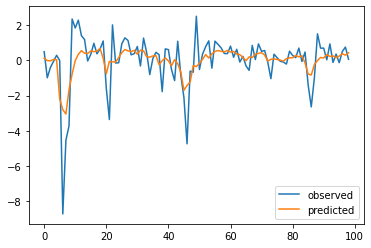

In [12]:
import matplotlib.pyplot as plt
t = list(range(len(xs)-1))
plt.plot(t,ys[:-1], t,xs[1:]) 
plt.legend(['observed','predicted'])